In [2]:
import pandas as pd

df = pd.read_csv("updated_pollution_dataset.csv")

This dataset focuses on air quality assessment across various regions. The dataset contains 5000 samples and captures critical environmental and demographic factors that influence pollution levels.

Key Features:
- Temperature (°C): Average temperature of the region.  
- Humidity (%): Relative humidity recorded in the region.  
- PM2.5 Concentration (µg/m³): Fine particulate matter levels.  
- PM10 Concentration (µg/m³): Coarse particulate matter levels.  
- NO2 Concentration (ppb): Nitrogen dioxide levels.  
- SO2 Concentration (ppb): Sulfur dioxide levels.  
- CO Concentration (ppm): Carbon monoxide levels.  
- Proximity to Industrial Areas (km): Distance to the nearest industrial zone.  
- Population Density (people/km²): Number of people per square kilometer in the region.

### Target Variable: Air Quality Levels  
- **Good:** Clean air with low pollution levels.  
- **Moderate:** Acceptable air quality but with some pollutants present.  
- **Poor:** Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous:** Highly polluted air posing serious health risks to the population.


In [3]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


Finding correlation between the data

In [5]:
df = pd.get_dummies(df, dtype=int, columns=["Air Quality"])

In [6]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality_Good,Air Quality_Hazardous,Air Quality_Moderate,Air Quality_Poor
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,0,0,1,0
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,0,0,1,0
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,0,0,1,0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1,0,0,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1,0,0,0


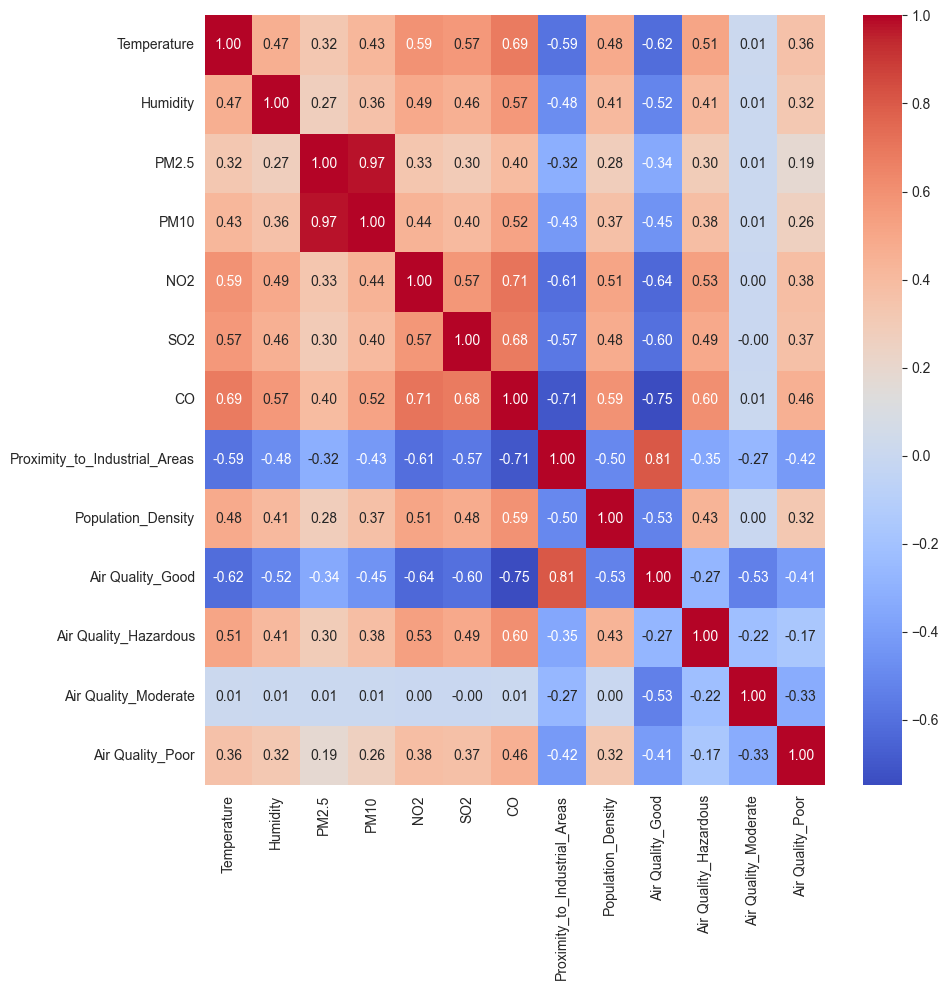

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mar = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mar, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

In [31]:
df = pd.read_csv("updated_pollution_dataset.csv")
df["Air Quality"].value_counts()


Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

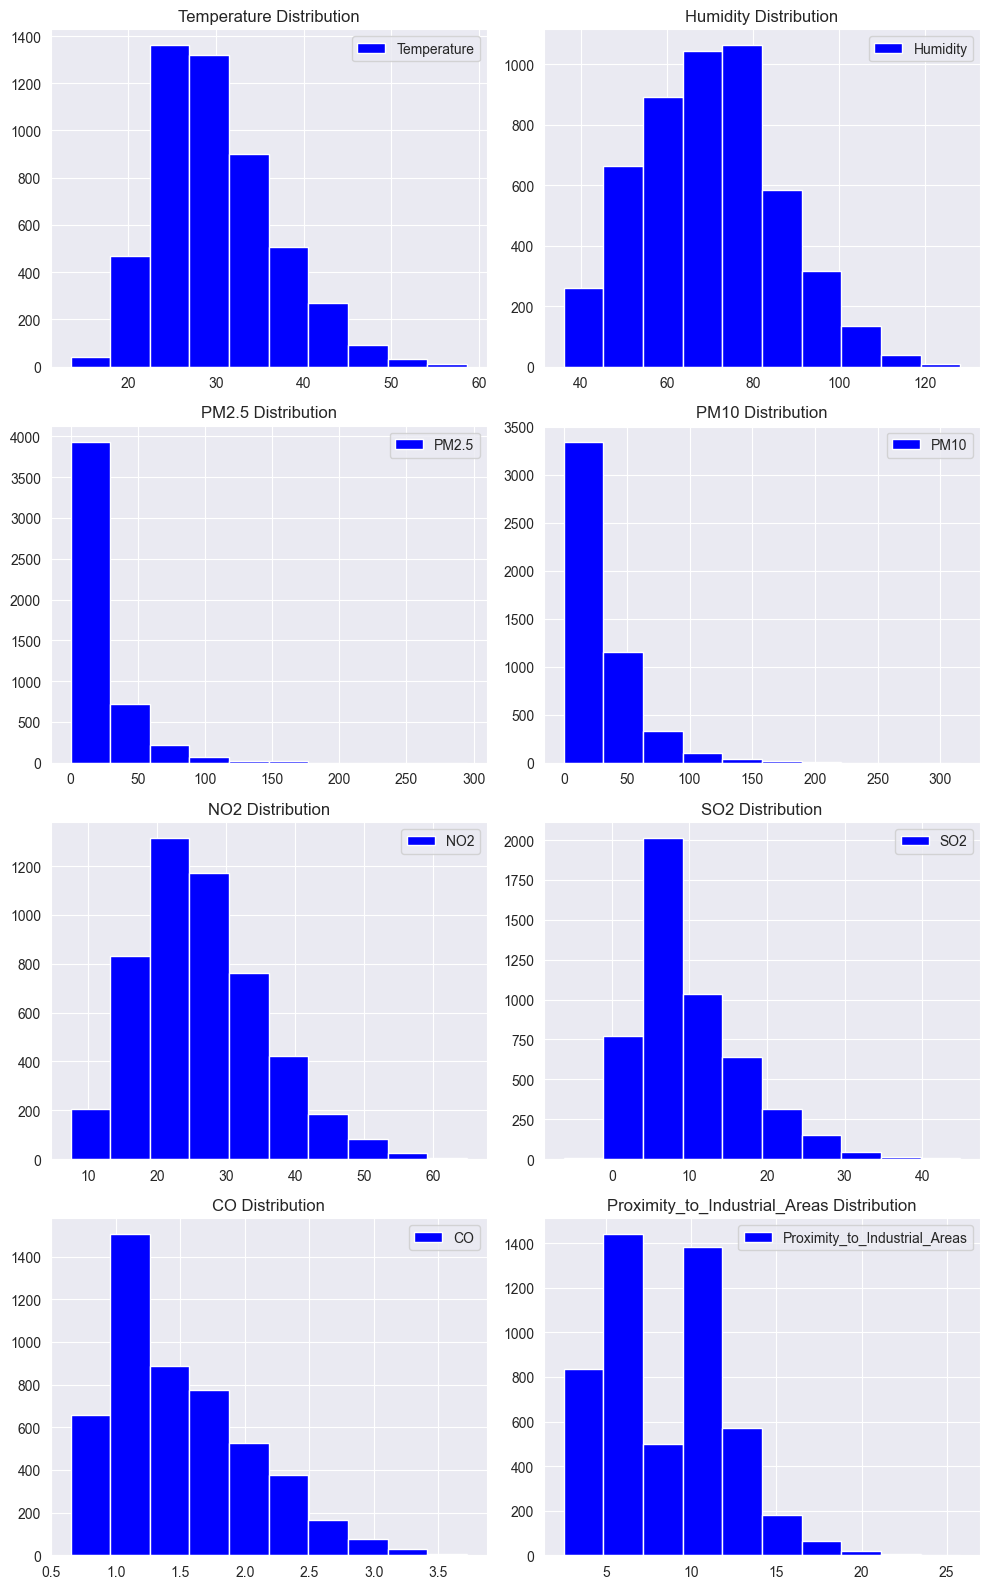

In [8]:
fig, ax = plt.subplots(4, 2, figsize=(10,16))


for i in range(8):
    ax[i//2, i%2].hist(bins=10, color="blue", x=df.iloc[:,i], label=df.iloc[:,i].name)
    ax[i//2, i%2].set_title(str(df.iloc[:,i].name) + " Distribution")
    ax[i//2, i%2].legend()


plt.tight_layout()        
plt.show()        
        
        

In [9]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

df = df.sample(frac=1)

X, Y = df.iloc[:,:9], df.iloc[:, 9:]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

In [10]:
X_train[:5]

array([[-0.09360432, -1.1257175 , -0.27867851, -0.42485785, -0.59723648,
        -0.96521167, -0.87981425,  0.51919599, -0.55273313],
       [-1.01622484, -0.18006063, -0.49454608, -0.58209938, -0.14751868,
         0.63487644,  0.1275633 , -0.83792571, -0.27120678],
       [-0.06384236, -0.43854018, -0.29904338, -0.5235909 , -0.49604997,
        -0.92076478, -0.62339087,  0.71307051, -0.78842962],
       [-1.17991557, -0.87354234, -0.54342175, -0.64060786, -0.11378985,
        -0.89113351, -1.04465785,  1.12851593, -0.70986412],
       [-1.06086776, -0.81049854,  1.8881431 ,  1.853316  , -0.11378985,
        -0.46148023,  0.05429948, -0.86562207,  1.20844337]])

In [11]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

clf = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid = {
    "criterion": ["gini", "entropy"],  # Function to measure the quality of a split
    "max_depth": [None, 10, 20, 30, 40],  # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 2, 4, 6],  # Minimum samples required to be at a leaf node
    "max_features": [None, "sqrt", "log2"],  # Number of features to consider at each split
    "max_leaf_nodes": [None, 10, 20, 50],  # Maximum number of leaf nodes
    "ccp_alpha": [0.0, 0.01, 0.1],  # Complexity parameter for cost-complexity pruning
}
)

grid_search.fit(X=X_train, y=Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10]})

[Text(0.28042035398230086, 0.9545454545454546, 'x[6] <= -0.578\ngini = 0.35\nsamples = 4000\nvalue = [[2404, 1596]\n[3600, 400]\n[2800, 1200]\n[3196, 804]]'),
 Text(0.04424778761061947, 0.8636363636363636, 'x[7] <= 0.339\ngini = 0.038\nsamples = 1615\nvalue = [[63.0, 1552.0]\n[1614.0, 1.0]\n[1557.0, 58.0]\n[1611.0, 4.0]]'),
 Text(0.16233407079646017, 0.9090909090909092, 'True  '),
 Text(0.017699115044247787, 0.7727272727272727, 'x[7] <= -1.115\ngini = 0.078\nsamples = 60\nvalue = [[60, 0]\n[59, 1]\n[5, 55]\n[56, 4]]'),
 Text(0.008849557522123894, 0.6818181818181818, 'gini = 0.0\nsamples = 3\nvalue = [[3, 0]\n[3, 0]\n[3, 0]\n[0, 3]]'),
 Text(0.02654867256637168, 0.6818181818181818, 'x[0] <= 2.109\ngini = 0.034\nsamples = 57\nvalue = [[57, 0]\n[56, 1]\n[2, 55]\n[56, 1]]'),
 Text(0.017699115044247787, 0.5909090909090909, 'gini = 0.0\nsamples = 55\nvalue = [[55, 0]\n[55, 0]\n[0, 55]\n[55, 0]]'),
 Text(0.035398230088495575, 0.5909090909090909, 'gini = 0.25\nsamples = 2\nvalue = [[2, 0]\n[1,

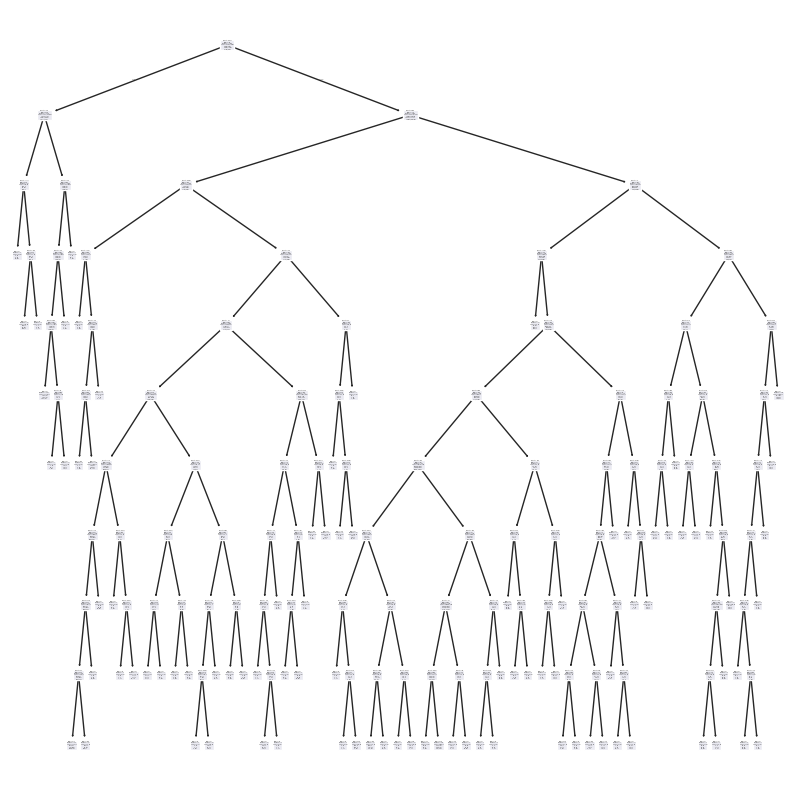

In [13]:
best_clf = grid_search.best_estimator_
plt.figure(figsize=(10, 10))
tree.plot_tree(best_clf)

In [14]:
y_pred = best_clf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

classification_results = classification_report(y_true=Y_test, y_pred=y_pred)
print(classification_results)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       404
           1       0.86      0.85      0.85       100
           2       0.92      0.94      0.93       300
           3       0.85      0.81      0.83       196

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.93      0.93      0.93      1000
 samples avg       0.93      0.93      0.93      1000



C:\Users\abdss\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


*The tree classification model didn't perform as intended so we are going a new model*
- *Let's try the neighbors algorithm*

In [34]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()

grid_search_2 = GridSearchCV(
    estimator=kn_clf,
    verbose=True,
    param_grid={
        "n_jobs": [-1],
        "n_neighbors": [10,20,21,25,27,30,35,40,45, 50, 100, 250, 500],
        "algorithm": ["ball_tree", "kd_tree"],
        "weights": ["uniform"],
    }
)

grid_search_2.fit(X=X_train, y=Y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


C:\Users\abdss\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'], 'n_jobs': [-1],
                         'n_neighbors': [10, 20, 21, 25, 27, 30, 35, 40, 45, 50,
                                         100, 250, 500],
                         'weights': ['uniform']},
             verbose=True)

In [35]:
best_kn_clf = grid_search_2.best_estimator_
y_pred_2 = best_kn_clf.predict(X_train)

classification_results_2 = classification_report(Y_train, y_pred_2)
print(classification_results_2)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1596
           1       0.94      0.71      0.81       400
           2       0.92      0.96      0.94      1200
           3       0.84      0.84      0.84       804

   micro avg       0.93      0.93      0.93      4000
   macro avg       0.92      0.88      0.89      4000
weighted avg       0.93      0.93      0.93      4000
 samples avg       0.93      0.93      0.93      4000



C:\Users\abdss\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


Failed again. Let's handle class imbalance

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)


X_res, y_res = smote.fit_resample(df.drop(columns=["Air Quality"]).iloc[:-1000], df["Air Quality"].iloc[-1000])

grid_search_3 = GridSearchCV(
    estimator=kn_clf,
    verbose=True,
    param_grid={
        "n_jobs": [-1],
        "n_neighbors": [10,20,25,30,35],
        "algorithm": ["ball_tree", "kd_tree"],
        "weights": ["uniform"],
    }
)

grid_search_3.fit(X=X_res, y=y_res)

ValueError: Expected array-like (array or non-string sequence), got 'Good'

In [46]:
best_kn_clf_ver2 = grid_search_3.best_estimator_

y_pred_2_v2 = best_kn_clf_ver2(X_test)

classification_results_2_v2 = classification_report()

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'